In [1]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
%matplotlib inline

# Задание 1

Загрузите `"Boston House Prices dataset"` из встроенных наборов данных библиотеки sklearn. Создайте датафреймы `X` и `y` из этих данных.

Разбейте эти датафреймы на тренировочные `(X_train, y_train)` и тестовые `(X_test, y_test)` с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял `30%` от всех данных, при этом аргумент `random_state` должен быть равен `42`.

Создайте модель линейной регрессии под названием `lr` с помощью класса `LinearRegression` из модуля `sklearn.linear_model`.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите `R2` полученных предсказаний с помощью `r2_score` из модуля `sklearn.metrics`.

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]))
y = pd.DataFrame(raw_df.values[1::2, 2])
X.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
                'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
y.columns = ['MEDV']

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((354, 13), (354, 1))

In [4]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [5]:
from sklearn.metrics import r2_score

In [6]:
y_predict = lr.predict(X_test)
r2_score(y_test, y_predict)

0.7112260057484874

# Задание 2

Создайте модель под названием `model` с помощью `RandomForestRegressor` из модуля `sklearn.ensemble`.

Сделайте аргумент `n_estimators` равным `1000`, `max_depth` должен быть равен `12` и `random_state` сделайте равным `42`.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель `LinearRegression`, но при этом в метод `fit` вместо датафрейма `y_train` поставьте `y_train.values[:, 0]`, чтобы получить из датафрейма одномерный массив `Numpy`, так как для класса `RandomForestRegressor` в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте `R2`. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [8]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [9]:
model.score(X_test, y_test)

0.87472606157312

В данном случае алгоритм Случайного леса чаще дает правильные ответы в отличие от линейной регрессии.

# Задание 3

Вызовите документацию для класса `RandomForestRegressor`, найдите информацию об атрибуте `feature_importances_`.

С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [10]:
print(RandomForestRegressor.feature_importances_.__doc__)


        The impurity-based feature importances.

        The higher, the more important the feature.
        The importance of a feature is computed as the (normalized)
        total reduction of the criterion brought by that feature.  It is also
        known as the Gini importance.

        high cardinality features (many unique values). See
        :func:`sklearn.inspection.permutation_importance` as an alternative.

        Returns
        -------
        feature_importances_ : ndarray of shape (n_features,)
            The values of this array sum to 1, unless all trees are single node
            trees consisting of only the root node, in which case it will be an
            array of zeros.
        


<BarContainer object of 13 artists>

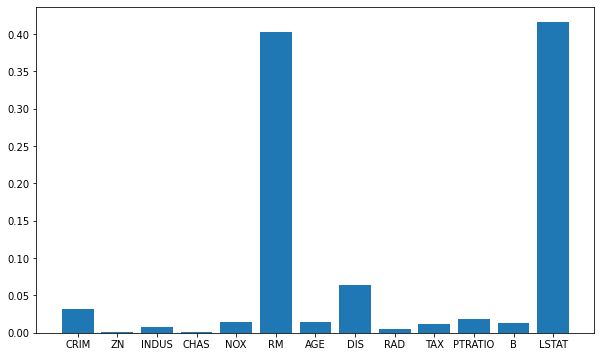

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(X.keys(), model.feature_importances_)

Наибольшую важность показывают признаки `RM` и `LSTAT`.

# Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке `Matplotlib`, это датасет __[Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)__. Для этого датасета мы будем решать задачу классификации - будем определять, какие из транзакций по кредитной карте являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики `accuracy` не принесет пользы и не поможет выбрать лучшую модель. Мы будем вычислять `AUC`, то есть площадь под кривой `ROC`.

Импортируйте из соответствующих модулей `RandomForestClassifier` и `GridSearchCV`.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Загрузите датасет `creditcard.csv` и создайте датафрейм `df`.

С помощью метода `value_counts` с аргументом `normalize=True` убедитесь в том, что выборка несбалансирована.

In [13]:
df = pd.read_csv('/data/notebook_files/creditcard.csv')
df.value_counts(normalize=True)

Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class
163152.0 -1.196037 1.585949 2.883976 3.378471 1.511706 3.717077 0.585362 -0.156001 0.122648 4.217934 1.385525 -0.709405 -0.256168 -1.564352 1.693218 -0.785210 -0.228008 -0.412833 0.234834 1.375790 -0.370294 0.524395 -0.355170 -0.869790 -0.133198 0.327804 -0.035702 -0.858197 7.56 0 0.000063
 -1.203617 1.574009 2.889277 3.381404 1.538663 3.698747 0.560211 -0.150911 0.124136 4.220998 1.384569 -0.706897 -0.256274 -1.562583 1.692915 -0.787338 -0.226776 -0.412354 0.234322 1.385597 -0.366727 0.522223 -0.357329 -0.870174 -0.134166 0.327019 -0.042648 -0.855262 1.51 0 0.000063
43153.0 -2.086016 2.203265 1.654339 2.941050 -1.683045 0.529728 -1.352162 1.793449 -0.723686 0.600365 -0.982212 -0.551636 -1.337000 0.834403 1.251862 0.033455 1.067978 0.160510 0.213087 0.079002 0.216444 0.567241 -0.035345 0.370201 0.157378 0.440341 0.210230 0.090558 0.76 0 0.000032
170731.0 2.033492 0.766969 -2.107555 3.631952 1.348594 -0.499907 0.945159 -0.286392 -1.370581 1.653073 -1.600434 -1.510901 -2.143280 1.189850 -0.875588 0.175808 -0.419433 -0.464717 -1.414528 -0.430560 0.241894 0.658545 -0.102644 0.580535 0.643637 0.347240 -0.116618 -0.078601 0.76 0 0.000032
68207.0 -13.192671 12.785971 -9.906650 3.320337 -4.801176 5.760059 -18.750889 -37.353443 -0.391540 -5.052502 4.406806 -4.610756 -1.909488 -9.072711 -0.226074 -6.211557 -6.248145 -3.149247 0.051576 -3.493050 27.202839 -8.887017 5.303607 -0.639435 0.263203 -0.108877 1.269566 0.939407 1.00 1 0.000021
 ... 
65149.0 -0.608037 0.277482 2.333740 0.713876 -0.686327 0.424502 0.158410 0.277078 0.005665 -0.574444 -0.383596 0.063757 0.435809 -0.294166 1.561564 0.430549 -0.512260 0.321857 -1.089111 0.192164 0.425425 1.077523 0.095700 0.080007 -0.087784 -0.253436 0.077868 0.055774 115.98 0 0.000004
 0.890428 -0.914533 0.916273 0.533497 -1.417793 -0.283902 -0.520284 0.002223 -1.050330 0.827726 1.336306 0.961705 0.778165 0.101997 0.352339 -0.892199 -0.538873 1.792922 -1.092627 -0.119284 -0.239564 -0.634749 -0.018377 0.482486 0.102384 -0.559266 0.040121 0.067240 192.05 0 0.000004
65150.0 -0.819167 1.289630 1.155617 -0.356589 0.742668 -1.179886 1.114827 -0.105033 -1.169136 -1.218791 1.841286 0.558376 0.081792 -1.028918 -0.400824 0.722658 0.402985 0.613975 -0.605494 -0.014715 -0.011025 -0.125263 -0.385443 0.449483 0.536560 0.252429 -0.020876 0.072608 0.76 0 0.000004
 -0.283939 1.355339 0.553398 0.255501 0.561040 -1.338352 1.056880 -0.229176 -0.738105 -1.157676 0.000759 -0.543236 -0.313497 -1.370815 0.770587 0.452886 1.064176 0.458320 -0.199074 -0.019922 -0.076192 -0.211969 -0.256209 0.259185 0.096589 0.327896 0.021232 0.083294 0.76 0 0.000004
172792.0 -0.533413 -0.189733 0.703337 -0.506271 -0.012546 -0.649617 1.577006 -0.414650 0.486180 -0.915427 -1.040458 -0.031513 -0.188093 -0.084316 0.041333 -0.302620 -0.660377 0.167430 -0.256117 0.382948 0.261057 0.643078 0.376777 0.008797 -0.473649 -0.818267 -0.002415 0.013649 217.00 0 0.000004
Length: 283726, dtype: float64

Используя метод `info`, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:

`pd.options.display.max_columns = 100`.

Просмотрите первые `10` строк датафрейма `df`.

In [15]:
pd.options.display.max_columns = 100
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Создайте датафрейм `X` из датафрейма `df`, исключив столбец `Class`.

Создайте объект `Series` под названием `y` из столбца `Class`.

Разбейте `X` и `y` на тренировочный и тестовый наборы данных при помощи функции `train_test_split`, используя аргументы: 

`test_size=0.3`, `random_state=100`, `stratify=y`.

У вас должны получиться объекты `X_train`, `X_test`, `y_train` и `y_test`.

Просмотрите информацию об их форме.

In [16]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((199364, 30), (199364,)), ((85443, 30), (85443,)))

Для поиска по сетке параметров задайте такие параметры:

`parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]`

Создайте модель `GridSearchCV` со следующими аргументами:

`estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3`.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

In [17]:
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

In [18]:
model = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3)
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

Просмотрите параметры лучшей модели с помощью атрибута `best_params_`.

In [19]:
model.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

Предскажите вероятности классов с помощью полученной модели и метода `predict_proba`.

Из полученного результата (массив `Numpy`) выберите столбец с индексом `1` (вероятность класса `1`) и запишите в массив `y_pred_proba`. 

Из модуля `sklearn.metrics` импортируйте метрику `roc_auc_score`.

Вычислите `AUC`, сравнив истинный результат тестовых данных с результатом, полученным моделью, используя в качестве аргументов массивы `y_test` и `y_pred_proba`.

In [20]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

# Дополнительные задания

1) Загрузите датасет `Wine` из встроенных датасетов `sklearn.datasets` с помощью функции `load_wine` в переменную `data`.

In [23]:
from sklearn.datasets import load_wine
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

2) Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список `data_keys`, содержащий ее ключи.

In [24]:
type(data)
data_keys = data.keys()

3) Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [25]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

4) Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [26]:
print(f"Целевая переменная содержит {len(set(data['target']))} класса")
print(f"Их названия: {data['target_names']}")

Целевая переменная содержит 3 класса
Их названия: ['class_0' 'class_1' 'class_2']


5) На основе данных датасета (они содержатся в двумерном массиве `Numpy`) и названий признаков создайте датафрейм под названием `X`.

In [27]:
X = pd.DataFrame(data=data['data'], columns=data['feature_names'])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


6) Выясните размер датафрейма `X` и установите, имеются ли в нем пропущенные значения.

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

7) Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных `numpy.int64`. Название поля - `'target'`.

In [29]:
X = X.join(pd.DataFrame(data=data['target'], columns=['target']))

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

8) Постройте матрицу корреляций для всех полей `X`. Дайте полученному датафрейму название `X_corr`.

In [31]:
X_corr = X.corr()
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


9) Создайте список `high_corr` из признаков, корреляция которых с полем `target` по абсолютному значению превышает `0.5` (причем, само поле `target` не должно входить в этот список).

In [32]:
high_corr = [feature for feature, value in X_corr['target'].items() if abs(value) > 0.5 and feature != 'target']
high_corr

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

10) Удалите из датафрейма `X` поле с целевой переменной. Для всех признаков, названия которых содержатся в списке `high_corr`, вычислите квадрат их значений и добавьте в датафрейм `X` соответствующие поля с суффиксом `'_2'`, добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые были в нем изначально, а также поля с признаками из списка `high_corr`, возведенными в квадрат. Выведите описание полей датафрейма `X` с помощью метода `describe`.

In [33]:
X = X.drop('target', axis=1)
for feature in high_corr:
    X = X.join(pd.Series(X[feature]**2, name=f'{feature}_2'))

In [34]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06
